In [144]:
import glob
import numpy as np
import pandas as pd
import xarray as xr
pd.set_option('display.expand_frame_repr', True)

In [121]:
# using glob function, create a list of all the files in the directory of the laboratory research results
all_files = glob.glob('C:\\Users\Jesse\Documents\FILES\BATTERY_DATA_ANALYSIS\DATA\*.xy')

In [185]:
#using the "all_files" glob function from above, iterate over the files and append them to a list named "data_processor"
data_processor = []
for file in all_files:
    data_read = pd.read_table(file,header=None)
    data_processor.append(data_read)
    
data = pd.concat(data_processor)

In [194]:
#display the first 5 rows of the data
data.head(10)

,0
0,#COMMAND: motor_cam bat13_x19z00y03_10 yr 3.5 ...
1,# sl1r sl1l sl1t sl1b sl2r sl2l sl2t sl2b sl3r...
2,# 2 2 0.03 0 1 1 5 5.01 10 10 0.1 0.1 4 4 0.4 ...
3,#Scan 0 Fri Jul 24 19:22:43 2015
4,"#At end of scan, counts: 0.983718 7957 1298 0"
5,#xr yr zr = 19 3.5 0
6,1 0
7,2 12
8,3 17
9,4 30


In [187]:
#display the last 5 rows of the data
data.tail()

,0
122923,8188 0
122924,8189 1
122925,8190 2
122926,8191 0
122927,8192 1


In [192]:
#display general info on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17660081 entries, 0 to 122927
Data columns (total 1 columns):
0    object
dtypes: object(1)
memory usage: 269.5+ MB


In [193]:
# future development
# split column
#data[0].str.split(' ',expand=True) 

#data.loc[6:8197].plot() #plot the data test example

In [196]:
#example test practice reading in just one file stand alone

# Read table into pandas

query1 = pd.read_table('C:\\Users\Jesse\Documents\FILES\BATTERY_DATA_ANALYSIS\DATA/bat13_x19z00y03_2.xy', header=None).loc[6:8197]
# Strip Text and Expand into two columns
query2 = query1[0].str.strip().str.split(' ',expand=True).set_index(0)
query2[1] = query2[1].astype(int)

In [199]:
query2a = pd.read_table('C:\\Users\Jesse\Documents\FILES\BATTERY_DATA_ANALYSIS\DATA/bat13_x19z00y03_2.xy', header=None)

In [229]:
query_command = query2a[0:1]
query_command2 = query_command[0].str.split('=',expand=True)
query_command2

,0
0,#COMMAND: motor_cam bat13_x19z00y03_2 yr 3.5 3...


In [232]:
line2 = query2a[1:2]
line2

,0
1,# sl1r sl1l sl1t sl1b sl2r sl2l sl2t sl2b sl3r...


In [234]:
line3 = query2a[2:3]
line3

,0
2,# 2 2 0.03 0 1 1 5 5.01 10 10 0.1 0.1 4 4 0.4 ...


In [235]:
line4 = query2a[3:4]
line4

,0
3,#Scan 0 Fri Jul 24 02:49:35 2015


In [237]:
line5 = query2a[4:5]
line5

,0
4,"#At end of scan, counts: 0.983718 7957 1298 0"


In [226]:
# Extract xr yr zr data, for testing purposes
query2b = query2a[5:6]
query2c = query2b[0].str.split('=',expand=True)
query2c

,0,1
5,#xr yr zr,19 3.5 0


In [216]:
#XY Data
query2.head()

,1
0,
1,0
2,10
3,15
4,18
5,51


In [238]:

query2a

,0
0,#COMMAND: motor_cam bat13_x19z00y03_2 yr 3.5 3...
1,# sl1r sl1l sl1t sl1b sl2r sl2l sl2t sl2b sl3r...
2,# 2 2 0.03 0 1 1 5 5.01 10 10 0.1 0.1 4 4 0.4 ...
3,#Scan 0 Fri Jul 24 02:49:35 2015
4,"#At end of scan, counts: 0.983718 7957 1298 0"
5,#xr yr zr = 19 3.5 0
6,1 0
7,2 10
8,3 15
9,4 18


In [225]:
#Extract Time
query_time = query2a[3:4]
query_time2 = query_time[0].str.split('=',expand=True)
query_time2

,0
3,#Scan 0 Fri Jul 24 02:49:35 2015


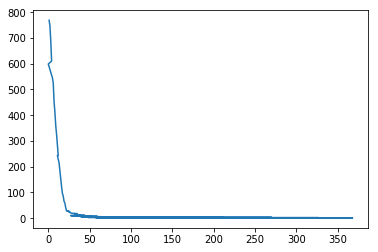

In [184]:
#print out of one continous x y data set (of the graph listed above)
query2[1].value_counts().plot()

In [195]:
query2.head()

,1
0,
1,0
2,10
3,15
4,18
5,51
